In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#load fluxtower evaporation data   
#observations from OzFlux sites
ea = np.loadtxt("../../data/Dingo/Ea_howard.txt", usecols=2) #mm/d
gpp = np.loadtxt("../../data/Dingo/GPPdaily_howard.txt", usecols=2) #mol/m2/d
tflux = np.genfromtxt("../../data/Dingo/Ea_howard.txt",usecols=0, dtype=np.str )#mm/d
tflux = pd.date_range(tflux[0], tflux[-1], freq='D')

In [3]:
lat_heat_vapor = 2.45   #[MJ/kg] 
rho_w = 997             #[kg/m3]

data_howard = np.loadtxt("../../data/VOM_input/HowardSprings/dailyweather.prn", skiprows=1 )
tmod = np.arange(datetime(int(data_howard[0,3]),int(data_howard[0,2]),int(data_howard[0,1])), 
                  datetime(int(data_howard[-1,3]),int(data_howard[-1,2]),int(data_howard[-1,1])), 
                  timedelta(days=1)).astype(datetime)
ep = 1000*data_howard[:, 7]/(lat_heat_vapor*rho_w) #mm/d
prec = data_howard[:, 6] #mm/d

data_howard2015 = np.loadtxt("../../data/VOM_input/HowardSprings2015/dailyweather.prn", skiprows=1 )
tmod2015 = np.arange(datetime(int(data_howard2015[0,3]),int(data_howard2015[0,2]),int(data_howard2015[0,1])), 
                  datetime(int(data_howard2015[-1,3]),int(data_howard2015[-1,2]),int(data_howard2015[-1,1])), 
                  timedelta(days=1)).astype(datetime)



<Figure size 1280x400 with 0 Axes>

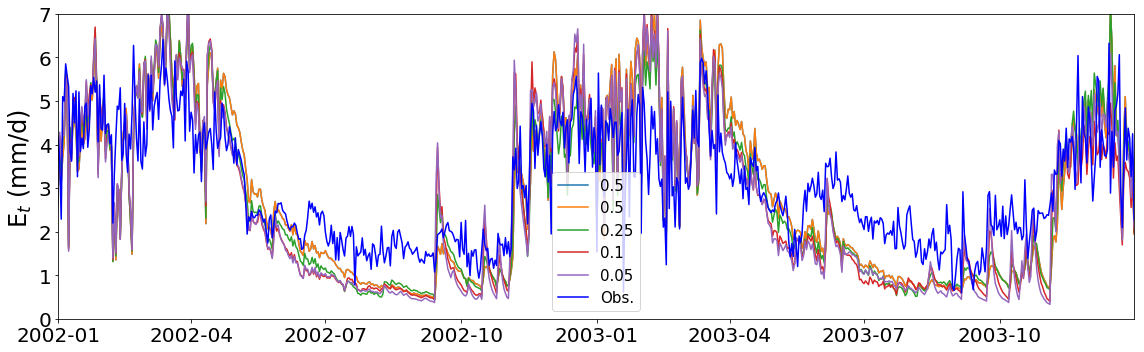

In [4]:
#make plots uncertainty e and ass
#random year, each run differnt coloured envelope
#2 columns, e and ass
#5 rows, catchmentsa
#compare with flux towers

i_site = 0
basin = ["AdelaideRiver", "DalyUncleared", "DryRiver", "HowardSprings", "SturtPlains"]

#year to plot per catchment
yearstart = 2002
yearend = 2003

#colors = ['red','darkgreen','purple', 'red', 'blue'  ]
labels = [ '0.5', '0.5', '0.25', '0.1', '0.05', '0.01']
suffix = ['1', '2', '3', '4', '5', '6' ]
directories = ['result_freedrainage','result_freedrainage_delz0_5' ]

    
    
    
fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k' )
fig, ((ax0 ))  = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))  

for irun in  np.array([0, 1,2,3,4 ]):  
    
    #load best run
    exec("best_data = np.genfromtxt('../../output/HowardSprings/result_freedrainage_delz/results_daily" + 
         str(irun+1) + "', skip_header=1)") #mm/d 
    
    ebest = best_data[:,10] + best_data[:,26] + best_data[:,27]
    tmod = np.arange(datetime(int(best_data[0,0]),int(best_data[0,1]),int(best_data[0,2])), 
                  datetime(int(best_data[-1,0]),int(best_data[-1,1]),int(best_data[-1,2])), 
                  timedelta(days=1)).astype(datetime)   
    if(len(tmod)<len(ebest)):
        ax0.plot(tmod, ebest[0:len(tmod)]*1000, label=labels[irun], zorder=1)   
    if(len(tmod)>len(ebest)):
        ax0.plot(tmod[0:len(ebest)], ebest*1000, label=labels[irun], zorder=1) 

ax0.plot(tflux, ea, color='blue', label='Obs.', zorder=1)
#ax0.plot(tmod2015[0:len(e2015)], e2015*1000,'.' , color='black', label='Results 2015 original', zorder=1)
#ax0.plot(tmod2015[0:len(e2015r)], e2015r*1000,'--' , color='grey', label='Results 2015 re-run', zorder=1)

ax0.set_ylabel(r'E$_{t}$ (mm/d) ', size=24  )

ax0.set_xlabel('' , size=24   )
ax0.set_xlim([datetime(yearstart,1, 1), datetime( yearend ,12, 31)]) 
for tick in ax0.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax0.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax0.set_ylim( [0,7] )
ax0.set_frame_on(True) # make it transparent

#add rainfall on top
#ax1 = ax0.twinx()
#ax1.stem(tmod[0:len(ebest)],-prec[0:len(ebest)] ,markerfmt=" ", basefmt=" ")
#ax1.set_ylabel(r'Prec. (mm/d) ', size=24  )
#ax1.set_xlim([datetime(yearstart,1, 1), datetime( yearend, 12, 31)])


#set labels
#max_pre = max(prec[:])
#y1_ticks = np.linspace(0, 250, 6)
#y1_ticklabels = [str(i) for i in y1_ticks]
#ax1.set_yticks(-1 * y1_ticks)
#ax1.set_yticklabels(y1_ticklabels, fontsize = 20)
#for tick in ax1.yaxis.get_major_ticks():
#    tick.label.set_fontsize(20)
#ax1.set_ylim( [-250, 0] )
 

ax0.legend(prop={'size':15})

#ax0.set_zorder(ax1.get_zorder()+1) # put ax in front of ax2
ax0.patch.set_visible(False)
plt.tight_layout()
i_site = i_site + 1

plt.show()


<Figure size 1280x400 with 0 Axes>

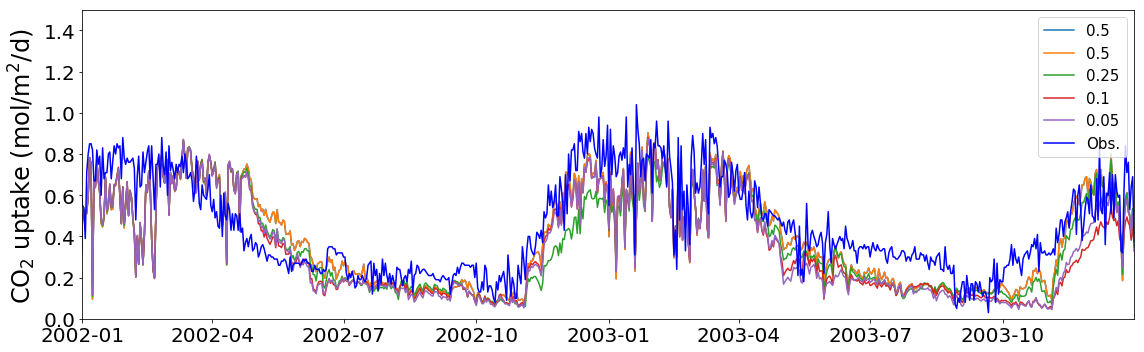

In [5]:
#make plots uncertainty e and ass
#random year, each run differnt coloured envelope
#2 columns, e and ass
#5 rows, catchmentsa
#compare with flux towers

i_site = 0
basin = ["AdelaideRiver", "DalyUncleared", "DryRiver", "HowardSprings", "SturtPlains"]

#year to plot per catchment
yearstart = 2002
yearend = 2003

#colors = ['red','darkgreen','purple', 'red', 'blue'  ]
labels = [ '0.5', '0.5', '0.25', '0.1', '0.05', '0.01']
suffix = ['1', '2', '3', '4', '5', '6' ]
directories = ['result_freedrainage','result_freedrainage_delz0_5' ]

   
    
    
fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k' )
fig, ((ax0 ))  = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))  

for irun in  np.array([0,1,2,3,4 ]):  
    
    #load best run
    exec("best_data = np.genfromtxt('../../output/HowardSprings/result_freedrainage_delz/results_daily" + 
         str(irun+1) + "', skip_header=1)") #mm/d 
    
    assbest = best_data[:,19] + best_data[:,20]
    tmod = np.arange(datetime(int(best_data[0,0]),int(best_data[0,1]),int(best_data[0,2])), 
                  datetime(int(best_data[-1,0]),int(best_data[-1,1]),int(best_data[-1,2])), 
                  timedelta(days=1)).astype(datetime)   
    if(len(tmod)<len(ebest)):
        ax0.plot(tmod, assbest[0:len(tmod)], label=labels[irun], zorder=1)   
    if(len(tmod)>len(ebest)):
        ax0.plot(tmod[0:len(assbest)], assbest, label=labels[irun], zorder=1) 

ax0.plot(tflux, -gpp, color='blue', label='Obs.', zorder=1)
#ax0.plot(tmod2015[0:len(e2015)], e2015*1000,'.' , color='black', label='Results 2015 original', zorder=1)
#ax0.plot(tmod2015[0:len(e2015r)], e2015r*1000,'--' , color='grey', label='Results 2015 re-run', zorder=1)

ax0.set_ylabel(r'CO$_{2}$ uptake (mol/m$^2$/d) ', size=24  )

ax0.set_xlabel('' , size=24   )
ax0.set_xlim([datetime(yearstart,1, 1), datetime( yearend ,12, 31)]) 
for tick in ax0.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax0.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax0.set_ylim( [0,1.5] )
ax0.set_frame_on(True) # make it transparent

#add rainfall on top
#ax1 = ax0.twinx()
#ax1.stem(tmod[0:len(ebest)],-prec[0:len(ebest)] ,markerfmt=" ", basefmt=" ")
#ax1.set_ylabel(r'Prec. (mm/d) ', size=24  )
#ax1.set_xlim([datetime(yearstart,1, 1), datetime( yearend, 12, 31)])


#set labels
#max_pre = max(prec[:])
#y1_ticks = np.linspace(0, 250, 6)
#y1_ticklabels = [str(i) for i in y1_ticks]
#ax1.set_yticks(-1 * y1_ticks)
#ax1.set_yticklabels(y1_ticklabels, fontsize = 20)
#for tick in ax1.yaxis.get_major_ticks():
#    tick.label.set_fontsize(20)
#ax1.set_ylim( [-250, 0] )
 

ax0.legend(prop={'size':15})

#ax0.set_zorder(ax1.get_zorder()+1) # put ax in front of ax2
ax0.patch.set_visible(False)
plt.tight_layout()
i_site = i_site + 1

plt.show()


<Figure size 1280x400 with 0 Axes>

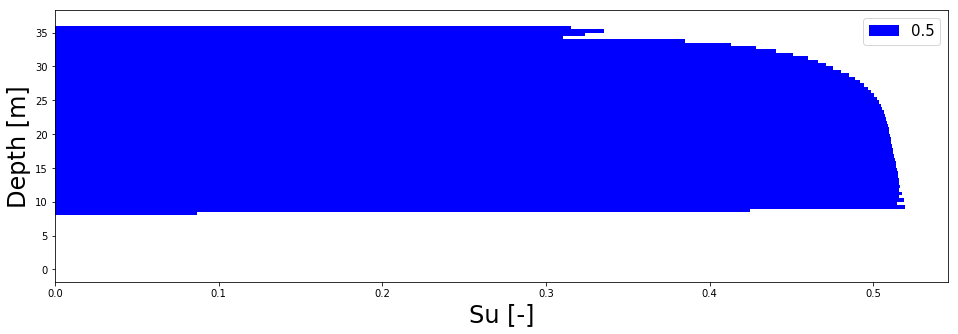

<Figure size 1280x400 with 0 Axes>

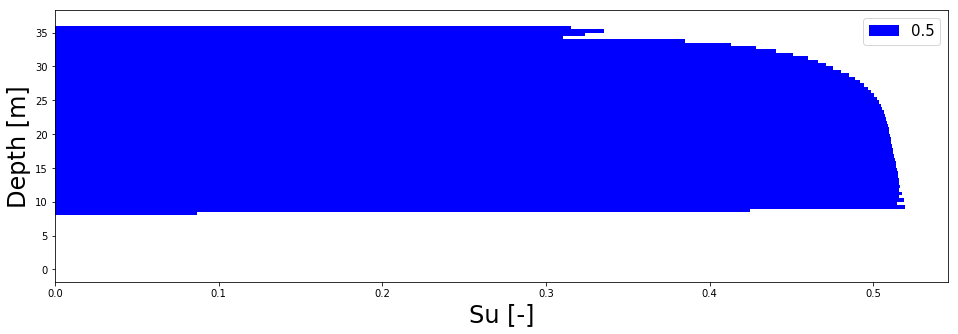

<Figure size 1280x400 with 0 Axes>

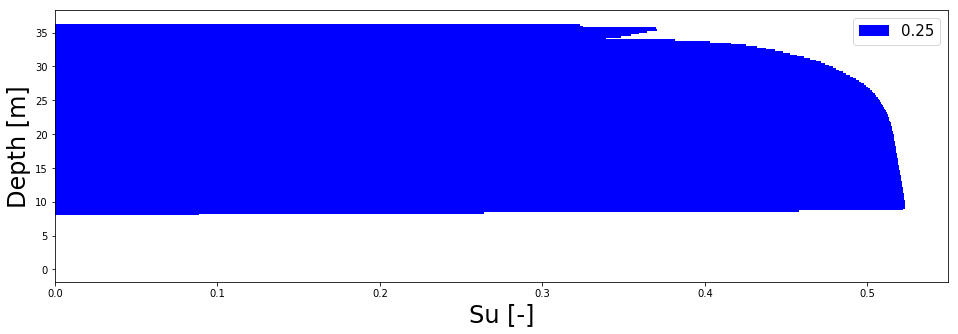

<Figure size 1280x400 with 0 Axes>

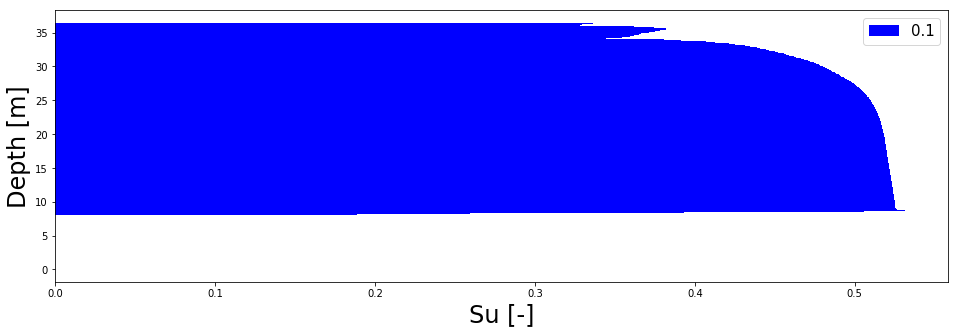

<Figure size 1280x400 with 0 Axes>

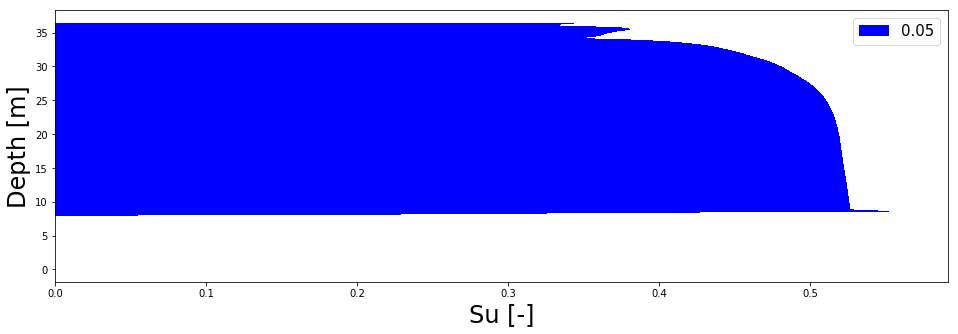

In [6]:
#average soil moisture profiles

delz = [ 0.5, 0.5, 0.25, 0.1, 0.05, 0.01]
labels = [ '0.5', '0.5', '0.25', '0.1', '0.05', '0.01']


for irun in  np.array([0,1,2,3,4 ]):  
    
    #load best run    
    #exec("su_data = np.genfromtxt('../../output/HowardSprings/result_freedrainage_delz/su_hourly" + 
    #     str(irun) + "', skip_header=1)") #mm/d 
    
    nlayers = int(36.5/delz[irun])
    t = 0
    su_data = np.zeros((8784,nlayers))
    su = np.zeros((nlayers))
    time = []
    depth = np.zeros((nlayers))
    depth[0] = 36.5-delz[irun]/2
    exec("file = open('../../output/HowardSprings/result_freedrainage_delz/su_hourly" + 
         str(irun+1) + "')") #mm/d     

    for line in file: 
        tmp_data = line.split()
        if(len(tmp_data)>5):
            time.append(tmp_data[0:4])
            su_data[t,0:len(tmp_data[5:-1])] = np.float_(tmp_data[5:-1])
            t = t + 1
        #su_data.append(np.float_(tmp_data[5:-1]))
    
    for ilayer in range(1,nlayers):
            su[ilayer] = np.mean(su_data[:,ilayer])
            depth[ilayer] = depth[ilayer - 1] - delz[irun]
    #make plot
    fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k' )
    fig, ((ax0 ))  = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))  
    
    ax0.barh( depth, width=su, height=delz[irun], color='blue', label=labels[irun], zorder=1)

    ax0.legend(prop={'size':15})

    ax0.set_ylabel('Depth [m]', size=24  )

    ax0.set_xlabel('Su [-]' , size=24   )
    #tmod = np.arange(datetime(int(su_data[0,0]),int(su_data[0,1]),int(su_data[0,2]), int(su_data[0,4]) ), 
    #              datetime(int(su_data[-1,0]),int(su_data[-1,1]),int(su_data[-1,2]),int(su_data[-1,4])  ), 
    #              timedelta(hours=1)).astype(datetime)   
    
    
    
    








<Figure size 1280x400 with 0 Axes>

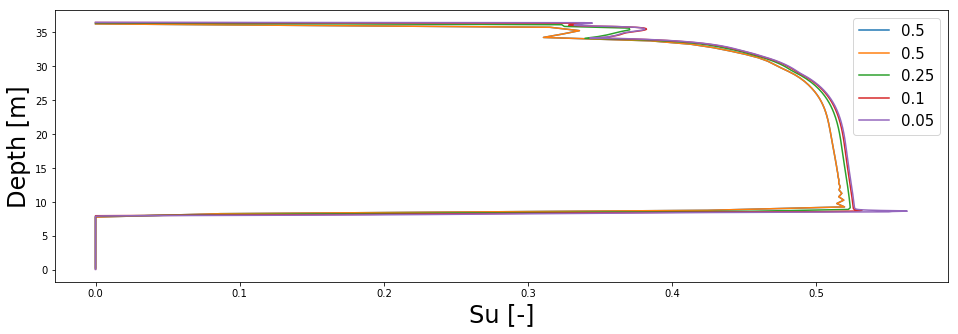

In [7]:
#average soil moisture profiles

delz = [ 0.5, 0.5, 0.25, 0.1, 0.05, 0.01]
labels = [ '0.5', '0.5', '0.25', '0.1', '0.05', '0.01']

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k' )
fig, ((ax0 ))  = plt.subplots(nrows=1, ncols=1, figsize=(16, 5)) 

for irun in  np.array([0,1,2,3,4 ]):  
    
    #load best run    
    #exec("su_data = np.genfromtxt('../../output/HowardSprings/result_freedrainage_delz/su_hourly" + 
    #     str(irun) + "', skip_header=1)") #mm/d 
    
    nlayers = int(36.5/delz[irun])
    t = 0
    su_data = np.zeros((8784,nlayers))
    su = np.zeros((nlayers))
    time = []
    depth = np.zeros((nlayers))
    depth[0] = 36.5-delz[irun]/2
    exec("file = open('../../output/HowardSprings/result_freedrainage_delz/su_hourly" + 
         str(irun+1) + "')") #mm/d     

    for line in file: 
        tmp_data = line.split()
        if(len(tmp_data)>5):
            time.append(tmp_data[0:4])
            su_data[t,0:len(tmp_data[5:-1])] = np.float_(tmp_data[5:-1])
            t = t + 1
        #su_data.append(np.float_(tmp_data[5:-1]))
    
    for ilayer in range(1,nlayers):
            su[ilayer] = np.mean(su_data[:,ilayer])
            depth[ilayer] = depth[ilayer - 1] - delz[irun]
    #make plot
 
    
    ax0.plot( su, depth, label=labels[irun], zorder=1)

    ax0.legend(prop={'size':15})
    ax0.set_ylabel('Depth [m]', size=24  )

    ax0.set_xlabel('Su [-]' , size=24   )
    
    #tmod = np.arange(datetime(int(su_data[0,0]),int(su_data[0,1]),int(su_data[0,2]), int(su_data[0,4]) ), 
    #              datetime(int(su_data[-1,0]),int(su_data[-1,1]),int(su_data[-1,2]),int(su_data[-1,4])  ), 
    #              timedelta(hours=1)).astype(datetime)   
    
    
    